# S&P 500 Project

In [63]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import alpaca_trade_api as tradeapi
from config import api_key, secret_key
from sqlalchemy import create_engine
import plotly.express as px

In [64]:
# Get URL of S&P 500 Wikipedia Table
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
tables

[    Symbol             Security SEC filings             GICS Sector  \
 0      MMM           3M Company     reports             Industrials   
 1      ABT  Abbott Laboratories     reports             Health Care   
 2     ABBV          AbbVie Inc.     reports             Health Care   
 3     ABMD          ABIOMED Inc     reports             Health Care   
 4      ACN        Accenture plc     reports  Information Technology   
 ..     ...                  ...         ...                     ...   
 500    YUM      Yum! Brands Inc     reports  Consumer Discretionary   
 501   ZBRA   Zebra Technologies     reports  Information Technology   
 502    ZBH        Zimmer Biomet     reports             Health Care   
 503   ZION        Zions Bancorp     reports              Financials   
 504    ZTS               Zoetis     reports             Health Care   
 
                       GICS Sub-Industry     Headquarters Location  \
 0              Industrial Conglomerates       St. Paul, Minneso

In [65]:
# Extract Table and only fetch the Symbol and Sector
sp500 = tables[0]
sp500 = sp500.sort_values(by = ['Symbol'])
sp500 = sp500.rename(columns = {'GICS Sector' : 'Sector'})
sp500 = sp500[['Symbol', 'Sector']]
sp500.head(3)

Symbol                  Sector
11      A             Health Care
28    AAL             Industrials
8     AAP  Consumer Discretionary

### Store Main CSV into DataFrame

In [66]:
# Create path to csv file 
main_csv = "../q3-2020-Resources/main.csv"
# Store into DataFrame
main_data_df = pd.read_csv(main_csv)
main_data_df = main_data_df[:-1]
main_data_df.head(3)

Symbol                    Name    Last  Change    %Chg    High     Low  \
0      A    Agilent Technologies  116.90    2.81  +2.46%  117.07  113.67   
1    AAL    American Airlines Gp   14.13   -0.85  -5.67%   14.96   13.93   
2    AAP  Advance Auto Parts Inc  147.70   -2.23  -1.49%  150.30  147.37   

       Volume      Time  
0   3778400.0  11/30/20  
1  97386898.0  11/30/20  
2   1521600.0  11/30/20

### Create new dataframe with select columns

In [67]:
# Clean the DataFrame 
new_main_data_df = main_data_df[["Symbol", "Name", "Last"]].copy()
new_main_data_df.head(3)

Symbol                    Name    Last
0      A    Agilent Technologies  116.90
1    AAL    American Airlines Gp   14.13
2    AAP  Advance Auto Parts Inc  147.70

### Store Technical CSV into DataFrame

In [68]:
# Create path to csv file 
technical_csv = "../q3-2020-Resources/technical.csv"
# Store into DataFrame
technical_data_df = pd.read_csv(technical_csv)
technical_data_df = technical_data_df[:-1]
new_technical_data_df = technical_data_df.copy()
new_technical_data_df.head(3)

Symbol                    Name    Last   Opinion 20D Rel Str 20D His Vol  \
0      A    Agilent Technologies  116.90  100% Buy      66.87%      25.53%   
1    AAL    American Airlines Gp   14.13   24% Buy      58.33%      77.75%   
2    AAP  Advance Auto Parts Inc  147.70    8% Buy      44.39%      25.55%   

   20D Avg Vol  52W Low  52W High  
0    2060575.0    61.13    118.96  
1   85022008.0     8.25     30.78  
2    1104440.0    71.33    170.50

### Clean DataFrame

In [69]:
# Clean the DataFrame
new_technical_data_df = technical_data_df[["Symbol","52W Low","52W High"]].copy()
new_technical_data_df = new_technical_data_df.rename(columns = {'52W Low': '_52W_Low', 
                                                                '52W High': '_52W_High'})
new_technical_data_df.head(3)

Symbol  _52W_Low  _52W_High
0      A     61.13     118.96
1    AAL      8.25      30.78
2    AAP     71.33     170.50

### Store Fundamental CSV into DataFrame

In [70]:
# Create path to csv file
fundamental_csv = "../q3-2020-Resources/fundamental.csv"
# Store into DataFrame
fundamental_data_df = pd.read_csv(fundamental_csv)
fundamental_data_df = fundamental_data_df[:-1]
new_fundamental_data_df = fundamental_data_df.copy()
new_fundamental_data_df.head(3)

Symbol                    Name    Market Cap  P/E ttm  EPS ttm  \
0      A    Agilent Technologies  3.517509e+10    34.86     3.19   
1    AAL    American Airlines Gp  9.062885e+09     0.00   -14.86   
2    AAP  Advance Auto Parts Inc  1.017350e+10    18.04     8.28   

   Net Income(a)  Beta  Dividend(a) Div Yield  
0   1.071000e+09  1.02         0.72     0.63%  
1   1.686000e+09  1.71         0.00     0.00%  
2   4.869000e+08  1.41         1.00     0.67%

### Clean DataFrame

In [71]:
# Clean the DataFrame
new_fundamental_data_df = fundamental_data_df[["Symbol","Market Cap","P/E ttm","Div Yield"]].copy()
new_fundamental_data_df = new_fundamental_data_df.rename(columns = {'Market Cap': 'Market_Cap', 
                                                                    'P/E ttm': 'PriceEarnings_ttm', 
                                                                    'Div Yield': 'Div_Yield'})
new_fundamental_data_df.sort_values(by = "Div_Yield", ascending = False).head(3)

Symbol    Market_Cap  PriceEarnings_ttm Div_Yield
286   LUMN  1.147599e+10               7.09     9.56%
247    IRM  7.671112e+09              11.32     9.29%
496    XOM  1.699327e+11             680.17     8.66%

### Store Performance CSV into DataFrame

In [72]:
# Create path to csv file
performance_csv = "../q3-2020-Resources/performance.csv"
# Store into DataFrame
performance_data_df = pd.read_csv(performance_csv)
performance_data_df = performance_data_df[:-1]
new_performance_data_df = performance_data_df.copy()
new_performance_data_df.head(3)

Symbol                    Name    Last  Wtd Alpha YTD %Chg  1M %Chg  \
0      A    Agilent Technologies  116.90      51.86  +37.03%  +14.51%   
1    AAL    American Airlines Gp   14.13     -47.56  -50.73%  +25.27%   
2    AAP  Advance Auto Parts Inc  147.70       8.56   -7.78%   +0.29%   

   3M %Chg 52W %Chg  
0  +17.02%  +44.73%  
1   +3.97%  -50.84%  
2   -4.57%   -5.97%

### Clean DataFrame

In [73]:
# Clean DataFrame
new_performance_data_df = performance_data_df[["Symbol","YTD %Chg", "1M %Chg", "3M %Chg", "52W %Chg"]].copy()
new_performance_data_df = new_performance_data_df.rename(columns = {'YTD %Chg': 'YTD_PerChg',
                                                                    '1M %Chg': '_1M_PerChg',
                                                                    '3M %Chg': '_3M_PerChg', 
                                                                    '52W %Chg': '_52W_PerChg'})
new_performance_data_df = new_performance_data_df.merge(sp500, on = 'Symbol', how = 'left')
new_performance_data_df = new_performance_data_df[['Symbol', 'Sector', 'YTD_PerChg', '_1M_PerChg', '_3M_PerChg', '_52W_PerChg']]
new_performance_data_df

Symbol                  Sector YTD_PerChg _1M_PerChg _3M_PerChg  \
0        A             Health Care    +37.03%    +14.51%    +17.02%   
1      AAL             Industrials    -50.73%    +25.27%     +3.97%   
2      AAP  Consumer Discretionary     -7.78%     +0.29%     -4.57%   
3     AAPL  Information Technology    +62.17%     +9.36%     -4.61%   
4     ABBV             Health Care    +18.12%    +22.89%    +11.05%   
..     ...                     ...        ...        ...        ...   
500    YUM  Consumer Discretionary     +5.03%    +13.36%     +8.57%   
501    ZBH             Health Care     -0.37%    +12.88%     +5.26%   
502   ZBRA  Information Technology    +48.14%    +33.42%    +35.07%   
503   ZION              Financials    -25.67%    +19.58%    +16.87%   
504    ZTS             Health Care    +21.18%     +1.15%     +0.24%   

    _52W_PerChg  
0       +44.73%  
1       -50.84%  
2        -5.97%  
3       +78.19%  
4       +19.21%  
..          ...  
500      +5.10%  
501      +2.64%  
502     +50.80%  
503     -22.48%  
504     +33.07%  

[505 rows x 6 columns]

In [74]:
# Get rid of the '%' and change type object into float
new_performance_data_df['YTD_PerChg'] = new_performance_data_df['YTD_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_1M_PerChg'] = new_performance_data_df['_1M_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_3M_PerChg'] = new_performance_data_df['_3M_PerChg'].str.replace("%", "").astype(float)
new_performance_data_df['_52W_PerChg'] = new_performance_data_df['_52W_PerChg'].str.replace("%", "").astype(float)

In [76]:
# Sort Year to Date % change values from highest to lowest
sortedYTD = new_performance_data_df.sort_values(by = ['YTD_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sortedYTD.groupby(['Sector'])
topTenYTDBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTenYTDBySector_reset = topTenYTDBySector.reset_index()

fig = px.pie(topTenYTDBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with YTD%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.Teal)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

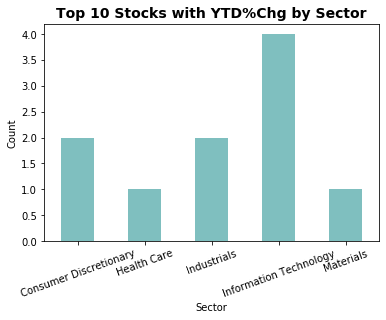

In [77]:
# Create Bar Chart as another visual
topTenYTDBySector.plot(kind = "bar", alpha=0.5, color='teal', align="center", legend = False, rot =20)
plt.title('Top 10 Stocks with YTD%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_5_YTDPerChg')
plt.show()

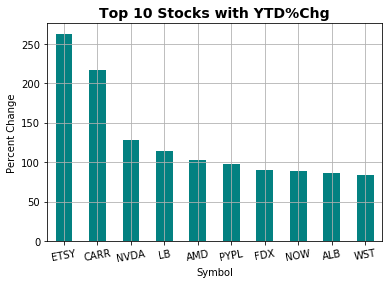

In [78]:
# Use sorted dataframe to plot top ten stocks with YTD%Chg
sortedYTD.plot(kind = "bar", x = 'Symbol', y = 'YTD_PerChg', alpha=0.99, color='teal', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with YTD%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_10_YTDPerChg')
plt.show()

In [80]:
# Sort 1 month % change values from highest to lowest
sorted1MChg = new_performance_data_df.sort_values(by = ['_1M_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted1MChg.groupby(['Sector'])
topTen1MBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen1MBySector_reset = topTen1MBySector.reset_index()

fig = px.pie(topTen1MBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 1M%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.Purp)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

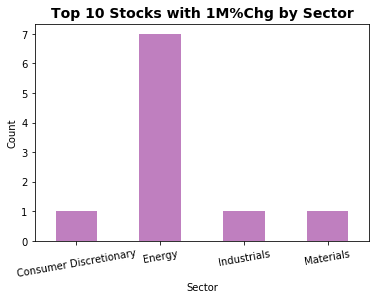

In [81]:
# Create Bar Chart as another visual
topTen1MBySector.plot(kind = "bar", alpha=0.5, color='purple', align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 1M%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_5_1MPerChg')
plt.show()

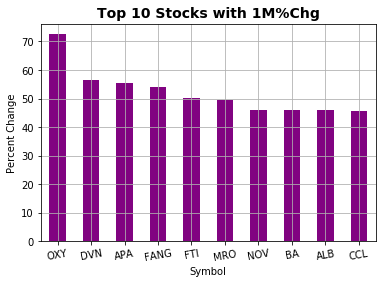

In [82]:
# Use sorted dataframe to plot top ten stocks with 1M%Chg
sorted1MChg.plot(kind = "bar", x = 'Symbol', y = '_1M_PerChg', alpha=0.99, color='purple', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 1M%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_10_1MPerChg')
plt.show()

In [84]:
# Sort 3 month % change values from highest to lowest
sorted3MChg = new_performance_data_df.sort_values(by = ['_3M_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted3MChg.groupby(['Sector'])
topTen3MBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen3MBySector_reset = topTen3MBySector.reset_index()

fig = px.pie(topTen3MBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 3M%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

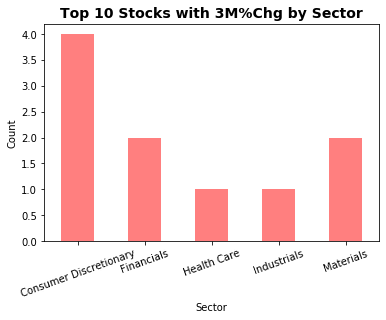

In [85]:
# Create Bar chart as another visual
topTen3MBySector.plot(kind = "bar", alpha=0.5, color='r', align="center", legend = False, rot =20)
plt.title('Top 10 Stocks with 3M%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_5_3MPerChg')
plt.show()

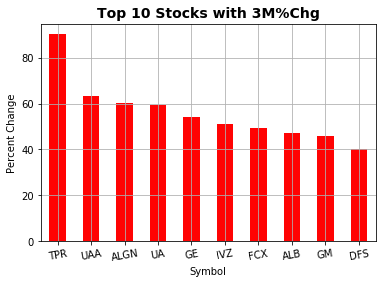

In [86]:
# Use sorted dataframe to plot bar graph of top 10 stocks with 3M%Chg
sorted3MChg.plot(kind = "bar", x = 'Symbol', y = '_3M_PerChg', alpha=0.99, color='r', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 3M%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_10_3MPerChg')
plt.show()

In [88]:
 # Sort 52 week % change values from highest to lowest
sorted52WChg = new_performance_data_df.sort_values(by = ['_52W_PerChg'], ascending = False).head(10)
grouped_new_performance_data_df = sorted52WChg.groupby(['Sector'])
topTen52WChgBySector = pd.DataFrame(grouped_new_performance_data_df['Symbol'].count())
topTen52WChgBySector_reset = topTen52WChgBySector.reset_index()



fig = px.pie(topTen52WChgBySector_reset, values='Symbol', names='Sector', title='Top 10 Stocks with 52W%Chg by Sector',
              labels=['Sector'], color_discrete_sequence=px.colors.sequential.algae)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

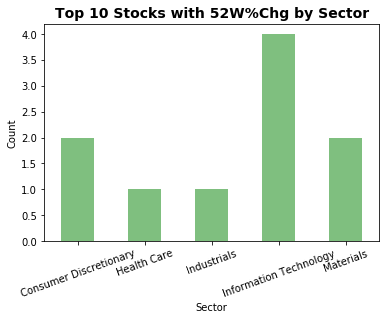

In [89]:
# Create bar chart for another visual 
topTen52WChgBySector.plot(kind = "bar", alpha=0.5, color='g', align="center", legend = False, rot =20)
plt.title('Top 10 Stocks with 52W%Chg by Sector', fontsize = 14, fontweight = 'bold')
plt.ylabel('Count')
plt.xlabel('Sector')
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_5_52WPerChg')
plt.show()

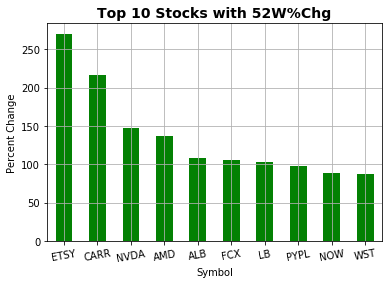

In [90]:
# Use sorted dataframe to create bar graph of top 10 stocks with 52W%Chg
_sorted52WChg = new_performance_data_df.sort_values(by = ['_52W_PerChg'], ascending = False).head(10)
_grouped_new_performance_data_df = _sorted52WChg.groupby(['Sector'])
_topTen52WChgBySector = pd.DataFrame(_grouped_new_performance_data_df['Symbol'].count())
_sorted52WChg.plot(kind = "bar", x = 'Symbol', y = '_52W_PerChg', alpha=0.99, color='g', 
                  align="center", legend = False, rot =10)
plt.title('Top 10 Stocks with 52W%Chg', fontsize = 14, fontweight = 'bold')
plt.ylabel('Percent Change')
plt.xlabel('Symbol')
plt.grid()
# Save Image
plt.savefig('../q3-2020-Resources/assets/images/Bar_Top_10_52WPerChg')
plt.show()

### Make an API calls

In [26]:
# Create api format from base url website 
api = tradeapi.REST(api_key, secret_key, base_url='https://api.alpaca.markets')
# Look up stock ticker DXCM (YTD) info
etsyYTD = api.polygon.historic_agg_v2('ETSY', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
etsyYTD = pd.DataFrame(etsyYTD)
etsyYTD = etsyYTD.reset_index()
# Get rid of the timestamp
etsyYTD['timestamp'] = pd.to_datetime(etsyYTD['timestamp']).dt.date
etsyYTD = etsyYTD.rename(columns = {'timestamp': 'Date'})
etsyYTD.head(3)

Date   open   high    low   close     volume     vwap
0  2020-01-02  44.71  45.61  44.71  45.190  2153331.0  45.0870
1  2020-01-03  44.50  45.32  44.02  44.900  2109770.0  44.9538
2  2020-01-06  44.67  45.19  44.36  44.835  2077085.0  44.7065

In [27]:
# Create api format from base url website 
api = tradeapi.REST(api_key, secret_key, base_url='https://api.alpaca.markets')
# Look up stock ticker CARR (YTD) info
carrYTD = api.polygon.historic_agg_v2('CARR', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
carrYTD = pd.DataFrame(carrYTD)
carrYTD = carrYTD.reset_index()
# Get rid of the timestamp
carrYTD['timestamp'] = pd.to_datetime(carrYTD['timestamp']).dt.date
carrYTD = carrYTD.rename(columns = {'timestamp': 'Date'})
carrYTD.head(3)

Date   open   high    low  close      volume     vwap
0  2020-04-03  13.75  17.00  13.38  16.92  67008862.0  16.1724
1  2020-04-06  17.06  17.15  14.85  15.44  37293052.0  15.8450
2  2020-04-07  15.20  15.80  14.55  15.25  23832157.0  15.2030

In [28]:
# Look up stock ticker NVDA (YTD) info
nvdaYTD = api.polygon.historic_agg_v2('NVDA', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
nvdaYTD = pd.DataFrame(nvdaYTD)
nvdaYTD = nvdaYTD.reset_index()
# Get rid of the timestamp
nvdaYTD['timestamp'] = pd.to_datetime(nvdaYTD['timestamp']).dt.date
nvdaYTD = nvdaYTD.rename(columns = {'timestamp': 'Date'})
nvdaYTD

Date      open      high       low   close     volume      vwap
0    2020-01-02  238.7500  239.9100  236.7200  239.91  5941969.0  238.7233
1    2020-01-03  235.1000  237.8300  234.1000  236.07  5141968.0  236.3844
2    2020-01-06  232.3200  237.2700  231.3100  237.06  6572812.0  235.4688
3    2020-01-07  238.2000  241.7700  236.3900  239.93  7980144.0  239.8552
4    2020-01-08  239.7600  242.0400  238.1490  240.38  6931017.0  240.3131
..          ...       ...       ...       ...     ...        ...       ...
226  2020-11-23  526.8452  535.3000  520.6200  525.60  9025055.0  526.4376
227  2020-11-24  525.7000  526.4800  515.4000  518.31  8642499.0  519.2432
228  2020-11-25  521.3000  530.7756  520.8000  529.39  6497910.0  527.5384
229  2020-11-27  535.0000  536.3000  526.8218  530.45  4181880.0  531.9951
230  2020-11-30  530.6000  536.5000  518.8941  536.06  7173800.0  530.5531

[231 rows x 7 columns]

In [29]:
# Look up stock ticker PYPL (YTD) info
lbYTD = api.polygon.historic_agg_v2('LB', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
lbYTD = pd.DataFrame(lbYTD)
lbYTD = lbYTD.reset_index()
# Get rid of the timestamp
lbYTD['timestamp'] = pd.to_datetime(lbYTD['timestamp']).dt.date
lbYTD = lbYTD.rename(columns = {'timestamp': 'Date'})
lbYTD.head(3)

Date   open   high     low  close      volume     vwap
0  2020-01-02  18.25  18.26  17.275  17.49   7442130.0  17.5096
1  2020-01-03  18.02  19.09  17.890  18.86  16374035.0  18.6672
2  2020-01-06  18.70  18.72  18.020  18.16   9048422.0  18.2288

In [31]:
# Look up stock ticker AMD (YTD) info
amdYTD = api.polygon.historic_agg_v2('AMD', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
amdYTD = pd.DataFrame(amdYTD)
amdYTD = amdYTD.reset_index()
# Get rid of the timestamp
amdYTD['timestamp'] = pd.to_datetime(amdYTD['timestamp']).dt.date
amdYTD = amdYTD.rename(columns = {'timestamp': 'Date'})
amdYTD

Date     open   high      low  close      volume     vwap
0    2020-01-02  46.8600  49.25  46.6300  49.10  80524599.0  48.1852
1    2020-01-03  48.0300  49.39  47.5400  48.60  73362157.0  48.5379
2    2020-01-06  48.0200  48.86  47.8600  48.39  48176286.0  48.4085
3    2020-01-07  49.3500  49.39  48.0400  48.25  59935556.0  48.4883
4    2020-01-08  47.8500  48.30  47.1400  47.83  53868957.0  47.7337
..          ...      ...    ...      ...    ...         ...      ...
226  2020-11-23  85.5200  87.54  84.6150  85.31  46504964.0  86.0894
227  2020-11-24  85.7235  86.11  83.3200  85.07  36839174.0  84.6013
228  2020-11-25  85.7600  87.84  85.5200  86.71  41349727.0  86.7819
229  2020-11-27  87.9900  88.00  86.3598  87.19  22717638.0  87.1464
230  2020-11-30  87.3300  92.74  86.5300  92.66  84482979.0  90.5230

[231 rows x 7 columns]

In [33]:
# Look up stock ticker SPY (YTD) info which references S&P 500
spyYTD = api.polygon.historic_agg_v2('SPY', 1, 'day', _from='2020-01-01', to='2020-11-30').df
# Create Dataframe
spyYTD = pd.DataFrame(spyYTD)
spyYTD = spyYTD.reset_index()
# Get rid of the timestamp
spyYTD['timestamp'] = pd.to_datetime(spyYTD['timestamp']).dt.date
spyYTD= spyYTD.rename(columns = {'timestamp': 'Date'})
spyYTD

Date    open    high      low   close      volume      vwap
0    2020-01-02  323.54  324.89  322.530  324.87  59498997.0  323.7095
1    2020-01-03  321.16  323.64  321.100  322.41  78022635.0  322.7868
2    2020-01-06  320.49  323.73  320.360  323.64  56028843.0  322.7126
3    2020-01-07  323.02  323.54  322.240  322.73  42908943.0  322.7126
4    2020-01-08  322.94  325.78  322.670  324.45  68548640.0  324.3291
..          ...     ...     ...      ...     ...         ...       ...
226  2020-11-23  357.28  358.82  354.865  357.46  62835493.0  356.9054
227  2020-11-24  360.21  363.81  359.290  363.22  62621630.0  362.0528
228  2020-11-25  363.13  363.16  361.480  362.66  43657514.0  362.5124
229  2020-11-27  363.84  364.18  362.580  363.67  28593306.0  363.5953
230  2020-11-30  362.83  363.12  359.170  362.06  83588299.0  361.7081

[231 rows x 7 columns]

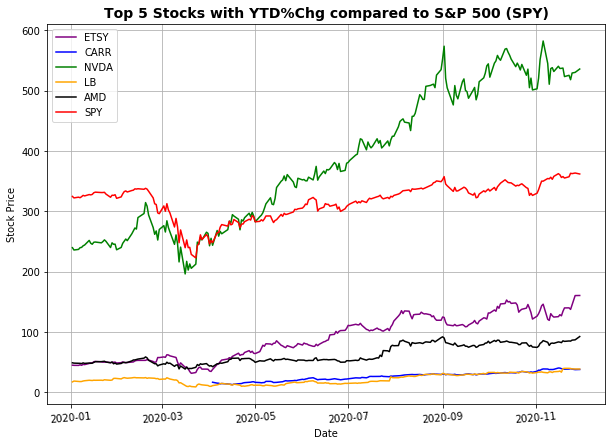

In [52]:
# Create Line graph
# Make sure ax = ax so every plot is on same Y-axis
# gca stands for 'get current axis'
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest Year to Date % Change 
etsyYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
carrYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
nvdaYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
lbYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
amdYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =5, figsize = (10,7))
spyYTD.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=5, figsize = (10,7))
ax.legend(["ETSY", "CARR", "NVDA", "LB", "AMD", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with YTD%Chg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save image
plt.savefig('../q3-2020-Resources/assets/images/Line_Top_5_YTD_PerChg')
plt.show()

### API Call for Top Stocks with best 1M%Chg as of 8/31/2020

In [35]:
# Look up stock ticker LB (1M) info
oxy = api.polygon.historic_agg_v2('OXY', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Store into DataFrame
oxy = pd.DataFrame(oxy)
oxy = oxy.reset_index()
# Get rid of timestamp
oxy['timestamp'] = pd.to_datetime(oxy['timestamp']).dt.date
oxy = oxy.rename(columns = {'timestamp': 'Date'})
oxy.head(3)

Date  open     high     low  close      volume    vwap
0  2020-10-30  9.00   9.1899  8.8512   9.13  23290264.0  9.0324
1  2020-11-02  9.26   9.7999  9.0300   9.65  28736528.0  9.5563
2  2020-11-03  9.89  10.0100  9.5900   9.69  19385398.0  9.7606

In [37]:
# Look up stock ticker MGM (1M) info
dvn = api.polygon.historic_agg_v2('DVN', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Store into DataFrame
dvn = pd.DataFrame(dvn)
dvn = dvn.reset_index()
# Get rid of timestamp
dvn['timestamp'] = pd.to_datetime(dvn['timestamp']).dt.date
dvn = dvn.rename(columns = {'timestamp': 'Date'})
dvn.head(3)

Date  open  high   low  close      volume    vwap
0  2020-10-30  8.44  8.93  8.34   8.93  15774950.0  8.7294
1  2020-11-02  9.07  9.58  8.67   9.43   9577506.0  9.2906
2  2020-11-03  9.69  9.90  9.44   9.64   9426869.0  9.6713

In [38]:
# Look up stock ticker CRM (1M) info
apa = api.polygon.historic_agg_v2('APA', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Store into DataFrame
apa = pd.DataFrame(apa)
apa = apa.reset_index()
# Get rid of timestamp
apa['timestamp'] = pd.to_datetime(apa['timestamp']).dt.date
apa = apa.rename(columns = {'timestamp': 'Date'})
apa.head(3)

Date   open   high    low  close      volume    vwap
0  2020-10-30  8.210  8.300  7.960  8.300  11479710.0  8.1746
1  2020-11-02  8.415  8.960  7.980  8.885  12978637.0  8.6437
2  2020-11-03  9.100  9.205  8.625  8.730  10428686.0  8.8474

In [39]:
# Look up stock ticker MOS (1M) info
fang = api.polygon.historic_agg_v2('FANG', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Store into DataFrame
fang = pd.DataFrame(fang)
fang = fang.reset_index()
# Get rid of timestamp
fang['timestamp'] = pd.to_datetime(fang['timestamp']).dt.date
fang = fang.rename(columns = {'timestamp': 'Date'})
fang.head(3)

Date   open   high     low  close     volume     vwap
0  2020-10-30  25.39  25.99  24.850  25.96  3395091.0  25.5591
1  2020-11-02  26.45  28.21  25.425  27.71  4311322.0  27.4775
2  2020-11-03  28.71  29.47  27.850  28.12  4269117.0  28.4954

In [40]:
# Look up stock ticker RCL (1M) info
fti = api.polygon.historic_agg_v2('FTI', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Store into DataFrame
fti = pd.DataFrame(fti)
fti = fti.reset_index()
# Get rid of timestamp
fti['timestamp'] = pd.to_datetime(fti['timestamp']).dt.date
fti = fti.rename(columns = {'timestamp': 'Date'})
fti.head(3)

Date  open   high    low  close     volume    vwap
0  2020-10-30  5.38  5.630  5.305   5.53  8871350.0  5.4823
1  2020-11-02  5.74  6.030  5.680   5.96  6516605.0  5.8969
2  2020-11-03  6.20  6.295  5.935   6.03  8381369.0  6.0793

In [41]:
# Look up stock ticker SPY (1M) info for referring to S&P 500
spy1M = api.polygon.historic_agg_v2('SPY', 1, 'day', _from='2020-10-30', to='2020-11-30').df
# Create Dataframe
spy1M = pd.DataFrame(spy1M)
spy1M = spy1M.reset_index()
# Get rid of the timestamp
spy1M['timestamp'] = pd.to_datetime(spy1M['timestamp']).dt.date
spy1M= spy1M.rename(columns = {'timestamp': 'Date'})
spy1M.head(3)

Date    open    high     low   close       volume      vwap
0  2020-10-30  328.28  329.69  322.60  326.54  120282921.0  325.7258
1  2020-11-02  330.20  332.36  327.24  330.20   86115746.0  329.6057
2  2020-11-03  333.69  338.25  333.17  336.03   93227788.0  335.9885

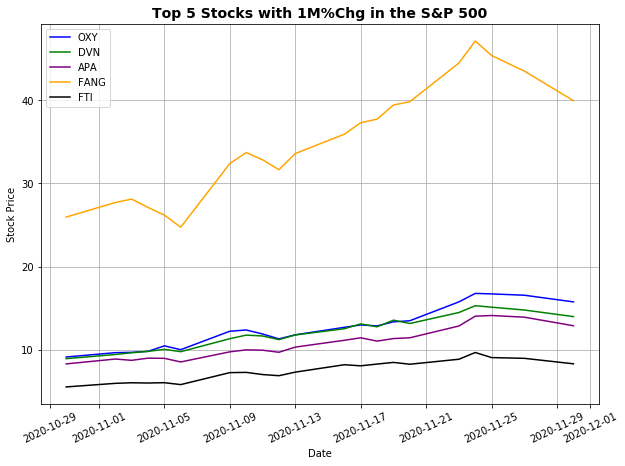

In [53]:
# Create Line Graph of Top 1M Stocks of S&P500
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 1 Month % Change 
oxy.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
dvn.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
apa.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
fang.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
fti.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
# spy1M.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["OXY", "DVN", "APA", "FANG", "FTI", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 1M%Chg in the S&P 500', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../q3-2020-Resources/assets/images/Line_Top_5_1M_PerChg')
plt.show()

### API Call for Top Stocks with best 3M%Chg as of 11/30/2020

In [45]:
# Look up stock ticker GPS (3M) info
tpr = api.polygon.historic_agg_v2('TPR', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Store into DataFrame
tpr = pd.DataFrame(tpr)
tpr = tpr.reset_index()
# Get rid of timestamp
tpr['timestamp'] = pd.to_datetime(tpr['timestamp']).dt.date
tpr = tpr.rename(columns = {'timestamp': 'Date'})
tpr.head(3)

Date   open   high     low  close     volume     vwap
0  2020-08-31  14.83  14.89  14.505  14.73  5406946.0  14.7129
1  2020-09-01  14.54  14.79  14.305  14.75  3765255.0  14.6137
2  2020-09-02  14.92  15.00  14.540  14.73  5548501.0  14.7467

In [46]:
# Look up stock ticker LB (3M) info
uaa3M = api.polygon.historic_agg_v2('UAA', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Store into DataFrame
uaa3M = pd.DataFrame(uaa3M)
uaa3M = uaa3M.reset_index()
# Get rid of timestamp
uaa3M['timestamp'] = pd.to_datetime(uaa3M['timestamp']).dt.date
uaa3M = uaa3M.rename(columns = {'timestamp': 'Date'})
uaa3M.head(3)

Date   open   high     low  close     volume     vwap
0  2020-08-31  10.09  10.13   9.725   9.81  3869938.0   9.8540
1  2020-09-01   9.72  10.26   9.660  10.25  5386752.0  10.0879
2  2020-09-02  10.32  10.56  10.180  10.39  6661079.0  10.3521

In [47]:
# Look up stock ticker RCL (3M) info
algn3M = api.polygon.historic_agg_v2('ALGN', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Store into DataFrame
algn3M = pd.DataFrame(algn3M)
algn3M = algn3M.reset_index()
# Get rid of timestamp
algn3M['timestamp'] = pd.to_datetime(algn3M['timestamp']).dt.date
algn3M = algn3M.rename(columns = {'timestamp': 'Date'})
algn3M.head(3)

Date    open    high      low   close    volume      vwap
0  2020-08-31  300.21  300.94  295.030  296.98  575217.0  297.8555
1  2020-09-01  297.10  307.25  293.330  305.43  714021.0  303.2680
2  2020-09-02  307.72  324.88  306.635  324.43  870856.0  318.0018

In [48]:
# Look up stock ticker RCL (3M) info
ua3M = api.polygon.historic_agg_v2('UA', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Store into DataFrame
ua3M = pd.DataFrame(ua3M)
ua3M = ua3M.reset_index()
# Get rid of timestamp
ua3M['timestamp'] = pd.to_datetime(ua3M['timestamp']).dt.date
ua3M = ua3M.rename(columns = {'timestamp': 'Date'})
ua3M.head(3)

Date  open   high   low  close     volume    vwap
0  2020-08-31  9.09  9.100  8.78   8.85  3551501.0  8.8733
1  2020-09-01  8.79  9.180  8.71   9.17  3513719.0  9.0391
2  2020-09-02  9.23  9.455  9.12   9.38  4433476.0  9.2961

In [49]:
# Look up stock ticker AMD (3M) info
ge3M = api.polygon.historic_agg_v2('GE', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Create Dataframe
ge3M = pd.DataFrame(ge3M)
ge3M = ge3M.reset_index()
# Get rid of the timestamp
ge3M['timestamp'] = pd.to_datetime(ge3M['timestamp']).dt.date
ge3M = ge3M.rename(columns = {'timestamp': 'Date'})
ge3M.head(3)

Date  open  high   low  close       volume    vwap
0  2020-08-31  6.51  6.69  6.26   6.34  143564420.0  6.4150
1  2020-09-01  6.27  6.40  6.15   6.19   94665135.0  6.2528
2  2020-09-02  6.20  6.45  6.17   6.44   84794270.0  6.3606

In [50]:
# Look up stock ticker SPY (3M) info for referring to S&P 500
spy3M = api.polygon.historic_agg_v2('SPY', 1, 'day', _from='2020-08-30', to='2020-11-30').df
# Create Dataframe
spy3M = pd.DataFrame(spy3M)
spy3M = spy3M.reset_index()
# Get rid of the timestamp
spy3M['timestamp'] = pd.to_datetime(spy3M['timestamp']).dt.date
spy3M= spy3M.rename(columns = {'timestamp': 'Date'})
spy3M.head(3)

Date    open    high     low   close      volume      vwap
0  2020-08-31  350.35  351.30  349.06  349.31  66243333.0  350.2569
1  2020-09-01  350.21  352.71  349.24  352.60  55135897.0  351.0848
2  2020-09-02  354.67  358.75  353.43  357.70  68758070.0  355.9977

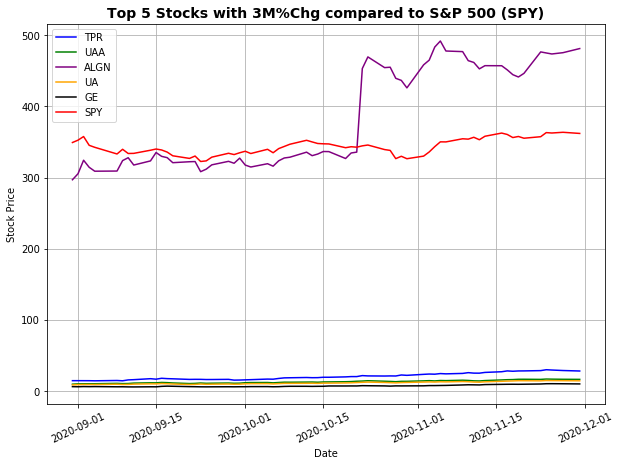

In [54]:
# Create Line Graph for top stocks with (3M) info
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 3 Month % Change 
tpr.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =45, figsize = (10,7))
uaa3M.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
algn3M.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
ua3M.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
ge3M.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
spy3M.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["TPR", "UAA", "ALGN", "UA", "GE", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 3M%Chg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../q3-2020-Resources/assets/images/Line_Top_5_3M_PerChg')
plt.show()

### API Call for Top Stocks with best 52W%Chg as of 8/31/2020

In [56]:
# Look up stock ticker NVDA (52W) info
etsy52 = api.polygon.historic_agg_v2('ETSY', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Create Dataframe
etsy52 = pd.DataFrame(etsy52)
etsy52 = etsy52.reset_index()
# Get rid of the timestamp
etsy52['timestamp'] = pd.to_datetime(etsy52['timestamp']).dt.date
etsy52 = etsy52.rename(columns = {'timestamp': 'Date'})
etsy52.head(3)

Date   open   high    low  close     volume     vwap
0  2019-12-02  43.71  43.75  41.73  43.12  2819775.0  42.6887
1  2019-12-03  41.92  42.97  41.69  42.63  2270110.0  42.6230
2  2019-12-04  42.99  43.29  41.97  42.14  2502104.0  42.4324

In [57]:
# Look up stock ticker CARR (52W) info
carr52 = api.polygon.historic_agg_v2('CARR', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Create Dataframe
carr52 = pd.DataFrame(carr52)
carr52 = carr52.reset_index()
# Get rid of the timestamp
carr52['timestamp'] = pd.to_datetime(carr52['timestamp']).dt.date
carr52 = carr52.rename(columns = {'timestamp': 'Date'})
carr52.head(3)

Date   open   high    low  close      volume     vwap
0  2020-04-03  13.75  17.00  13.38  16.92  67008862.0  16.1724
1  2020-04-06  17.06  17.15  14.85  15.44  37293052.0  15.8450
2  2020-04-07  15.20  15.80  14.55  15.25  23832157.0  15.2030

In [58]:
# Look up stock ticker AAPL (52W) info
# AAPL's stock split on 8/31/20 so most of their numbers have recently changed
nvda52 = api.polygon.historic_agg_v2('NVDA', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Store in DataFrame
nvda52 = pd.DataFrame(nvda52)
nvda52 = nvda52.reset_index()
# Get rid of timestamp
nvda52['timestamp'] = pd.to_datetime(nvda52['timestamp']).dt.date
nvda52 = nvda52.rename(columns = {'timestamp': 'Date'})
nvda52.head(3)

Date    open    high     low   close      volume      vwap
0  2019-12-02  216.46  217.00  208.64  209.25   9346742.0  210.9791
1  2019-12-03  201.87  207.82  200.37  207.66  11853653.0  204.3981
2  2019-12-04  211.02  211.92  208.27  209.42   6840459.0  210.0483

In [59]:
# Look up stock ticker AMD (52W) info
amd52 = api.polygon.historic_agg_v2('AMD', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Create Dataframe
amd52 = pd.DataFrame(amd52)
amd52 = amd52.reset_index()
# Get rid of the timestamp
amd52['timestamp'] = pd.to_datetime(amd52['timestamp']).dt.date
amd52 = amd52.rename(columns = {'timestamp': 'Date'})
amd52.head(3)

Date   open   high    low  close      volume     vwap
0  2019-12-02  39.32  39.41  38.44  38.73  37942678.0  38.8044
1  2019-12-03  37.34  38.93  37.15  38.90  52991201.0  38.1865
2  2019-12-04  39.38  39.82  39.13  39.69  44348195.0  39.5474

In [60]:
# Look up stock ticker DXCM (52W) info
alb52 = api.polygon.historic_agg_v2('ALB', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Create Dataframe
alb52 = pd.DataFrame(alb52)
alb52 = alb52.reset_index()
# Get rid of the timestamp
alb52['timestamp'] = pd.to_datetime(alb52['timestamp']).dt.date
alb52 = alb52.rename(columns = {'timestamp': 'Date'})
alb52.head(3)

Date   open     high    low  close     volume     vwap
0  2019-12-02  65.67  66.8173  64.97  65.04  1150590.0  65.4700
1  2019-12-03  63.66  63.8700  62.11  63.65  1612614.0  63.2366
2  2019-12-04  64.20  65.1900  62.89  62.92  1574003.0  63.8289

In [61]:
# Look up stock ticker SPY (52W) info for referring to S&P 500
spy52 = api.polygon.historic_agg_v2('SPY', 1, 'day', _from='2019-11-30', to='2020-11-30').df
# Create Dataframe
spy52 = pd.DataFrame(spy52)
spy52 = spy52.reset_index()
# Get rid of the timestamp
spy52['timestamp'] = pd.to_datetime(spy52['timestamp']).dt.date
spy52= spy52.rename(columns = {'timestamp': 'Date'})
spy52.head(3)

Date    open    high     low   close      volume      vwap
0  2019-12-02  314.59  314.66  311.17  311.64  76303760.0  312.2282
1  2019-12-03  308.65  309.64  307.13  309.55  75345130.0  308.6454
2  2019-12-04  310.70  312.12  310.32  311.46  49420904.0  311.4243

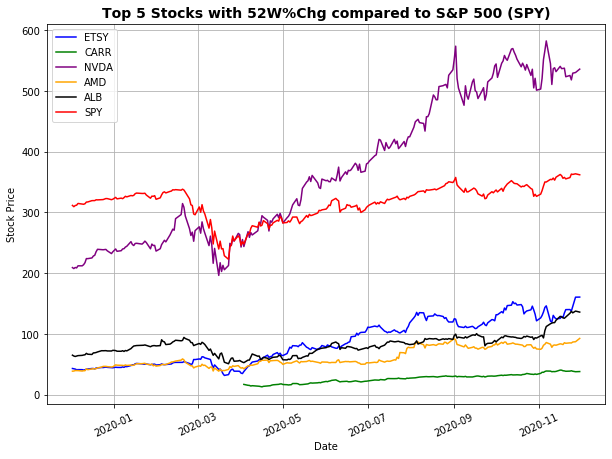

In [62]:
# Creat Line Graph for Top stocks with 52W%Chg
# Make sure ax = ax so every plot is on same Y-axis
ax = plt.gca()
# Plot the Top 5 stocks in S&P 500 with highest 52 week % Change
etsy52.plot(kind = 'line', x = 'Date', y = 'close', color ='blue', ax=ax, rot =25, figsize = (10,7))
carr52.plot(kind = 'line', x = 'Date', y = 'close', color ='green', ax=ax, rot =25, figsize = (10,7))
nvda52.plot(kind = 'line', x = 'Date', y = 'close', color ='purple', ax=ax, rot =25, figsize = (10,7))
amd52.plot(kind = 'line', x = 'Date', y = 'close', color ='orange', ax=ax, rot =25, figsize = (10,7))
alb52.plot(kind = 'line', x = 'Date', y = 'close', color ='black', ax=ax, rot =25, figsize = (10,7))
spy52.plot(kind = 'line', x = 'Date', y = 'close', color ='red', ax=ax, rot=25, figsize = (10,7))
ax.legend(["ETSY", "CARR", "NVDA", "AMD", "ALB", "SPY"])
plt.grid()
plt.title('Top 5 Stocks with 52W%Chg compared to S&P 500 (SPY)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Stock Price')
# Save Image
plt.savefig('../q3-2020-Resources/assets/images/Line_Top_5_52WPerChg')
plt.show()

### Create Connection

In [ ]:
rds_connection_string = "postgres:postgres@localhost:5432/sp500_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

### Check for tables

In [ ]:
engine.table_names()

### Use pandas to load csv converted DataFrame into database

In [ ]:
new_main_data_df.to_sql(name='main_data', con=engine, if_exists='replace', index=False)
new_technical_data_df.to_sql(name='technical_data', con=engine, if_exists='replace', index=False)
new_fundamental_data_df.to_sql(name='fundamental_data', con=engine, if_exists='replace', index=False)
new_performance_data_df.to_sql(name='performance_data', con=engine, if_exists='replace', index=False)

### Confirm data has been added by querying the main_data table
* NOTE: can also check using pgAdmin

In [ ]:
pd.read_sql_query('select * from main_data', con=engine).head()

### Confirm data has been added by querying the technical_data table

In [ ]:
pd.read_sql_query('select * from technical_data', con=engine).head()

### Confirm data has been added by querying the fundamental_data table

In [ ]:
pd.read_sql_query('select * from fundamental_data', con=engine).head()

### Confirm data has been added by querying the performance_data table

In [ ]:
pd.read_sql_query('select * from performance_data', con=engine).head()